# Pandas DataFrame 추가 정리


## 데이터프레임 인덱스 설정

In [ ]:
import pandas as pd
import numpy as np

### 1. 데이터프레임의 속성값에 직접 입력

In [ ]:
df = pd.DataFrame(np.arange(9).reshape(3, 3))
df

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8


In [ ]:
df.index = ['a', 'b', 'c']
df

,0,1,2
a,0,1,2
b,3,4,5
c,6,7,8


### 2. 내부 컬럼(열) 이용

In [ ]:
df2 = pd.DataFrame([
    ['a', 0, 1, 2],
    ['b', 3, 4, 5],
    ['c', 6, 7, 8]
])
df2

,0,1,2,3
0,a,0,1,2
1,b,3,4,5
2,c,6,7,8


In [ ]:
df2.set_index(0, inplace=True) # drop=True (인덱스로 만든 열을 기존 데이터프레임에서 지울 것인지)
                               # append=False (기존 인덱스를 삭제할 것인지)
                               # inplace=False (원본 객체를 변경할 것인지): deprecated
df2

,1,2,3
0,,,
a,0,1,2
b,3,4,5
c,6,7,8


### 3. 데이터프레임의 컬럼을 재설정

In [ ]:
df2.reset_index() # drop=False (인덱스로 만든 열을 기존 데이터프레임에서 지울 것인지)
                  # inplace=False (기본 인덱스를 삭제할 것인지)

,0,1,2,3
0,a,0,1,2
1,b,3,4,5
2,c,6,7,8


In [ ]:
df2 # 원본 데이터를 변하지 않음

,1,2,3
0,,,
a,0,1,2
b,3,4,5
c,6,7,8


# DAS_1기의 MBTI 살펴보기

In [1]:
import pandas as pd

In [2]:
mbti = [
    'ISTJ',
    'INFJ',
    'ISTJ',
    'ESTP',
    'ENTP',
    'ISFP',
    'ISTJ',
    'INFJ',
    'ISTJ',
    'ESTJ',
    'ENFJ',
    'INFJ',
    'ENFP',
    'ESFP',
    'ENFJ',
    'INTJ',
    'INTP',
    'ISTP',
    'ISFJ',
    'ISTJ',
    'INTP',
    'ISFJ',
    'ESTJ',
    'ISFP',
    'ENFP',
    'ENTJ',
    'ISTP',
    'ISTP',
    'ENFJ',
    'ENFP',
    'ESTJ',
    'ENTP',
    'ISFP',
    'ENTP',
    'ESFP',
    'ISFJ',
    'ISTJ',
    'ENTJ',
    'ENFJ',
    'ISFP',
    'ENFJ',
    'ENFP',
    'ISFJ',
    'ISFJ',
    'ENFP',
    'ESTJ',
    'ENTJ'
]

In [5]:
ds_mbti = pd.DataFrame(mbti)
ds_mbti.head()

,0
0,ISTJ
1,INFJ
2,ISTJ
3,ESTP
4,ENTP


In [6]:
ds_mbti.tail()

,0
42,ISFJ
43,ISFJ
44,ENFP
45,ESTJ
46,ENTJ


In [7]:
ds_mbti.describe()

,0
count,47
unique,14
top,ISTJ
freq,6


In [8]:
# 시리즈로 가져올 때는
ds_mbti[0]

0     ISTJ
1     INFJ
2     ISTJ
3     ESTP
4     ENTP
5     ISFP
6     ISTJ
7     INFJ
8     ISTJ
9     ESTJ
10    ENFJ
11    INFJ
12    ENFP
13    ESFP
14    ENFJ
15    INTJ
16    INTP
17    ISTP
18    ISFJ
19    ISTJ
20    INTP
21    ISFJ
22    ESTJ
23    ISFP
24    ENFP
25    ENTJ
26    ISTP
27    ISTP
28    ENFJ
29    ENFP
30    ESTJ
31    ENTP
32    ISFP
33    ENTP
34    ESFP
35    ISFJ
36    ISTJ
37    ENTJ
38    ENFJ
39    ISFP
40    ENFJ
41    ENFP
42    ISFJ
43    ISFJ
44    ENFP
45    ESTJ
46    ENTJ
Name: 0, dtype: object

In [10]:
# I와 E 구분하기
ds_mbti[0].str.contains('I')

0      True
1      True
2      True
3     False
4     False
5      True
6      True
7      True
8      True
9     False
10    False
11     True
12    False
13    False
14    False
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22    False
23     True
24    False
25    False
26     True
27     True
28    False
29    False
30    False
31    False
32     True
33    False
34    False
35     True
36     True
37    False
38    False
39     True
40    False
41    False
42     True
43     True
44    False
45    False
46    False
Name: 0, dtype: bool

In [13]:
# 위에서의 결과값을 데이터프레임으로 반환하려면? -> boolean 사용
mbti_I = ds_mbti[ds_mbti[0].str.contains('I')]

In [14]:
# E값들 따로 넣기
mbti_E = ds_mbti[ds_mbti[0].str.contains('E')]

In [15]:
# I의 정보 확인
mbti_I.describe()

,0
count,24
unique,7
top,ISTJ
freq,6


In [17]:
# E의 정보 확인
mbti_E.describe()

,0
count,23
unique,7
top,ENFJ
freq,5


In [19]:
# T 나누기
mbti_T = ds_mbti[ds_mbti[0].str.contains('T')]

In [20]:
# F 나누기
mbti_F = ds_mbti[ds_mbti[0].str.contains('F')]

In [21]:
mbti_T.describe()

,0
count,23
unique,8
top,ISTJ
freq,6


In [22]:
mbti_F.describe()

,0
count,24
unique,6
top,ENFJ
freq,5


## MBTI별 궁합 알아보기

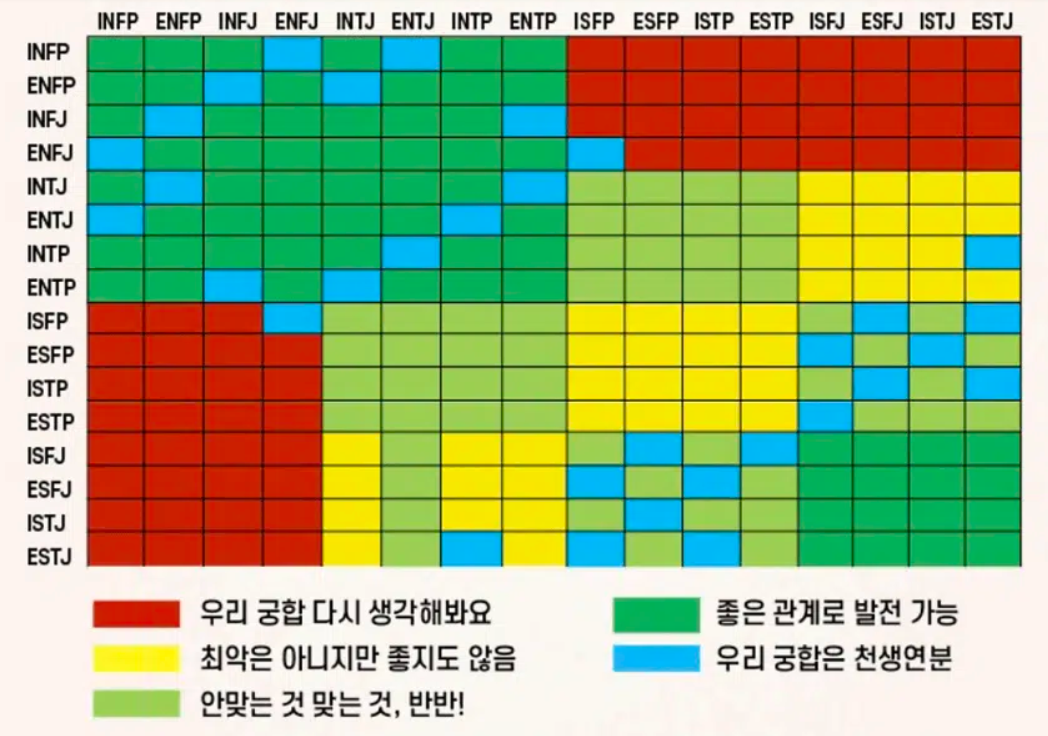

In [23]:
df_mbti = pd.DataFrame([
    [4, 4, 4, 5, 4, 5, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1], # INFP
    [4, 4, 5, 4, 5, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1], # ENFP
    [4, 5, 4, 4, 4, 4, 4, 5, 1, 1, 1, 1, 1, 1, 1, 1], # INFJ
    [5, 4, 4, 4, 4, 4, 4, 4, 5, 1, 1, 1, 1, 1, 1, 1], # ENFJ
    [4, 5, 4, 4, 4, 4, 4, 5, 3, 3, 3, 3, 2, 2, 2, 2], # INTJ
    [5, 4, 4, 4, 4, 4, 5, 4, 3, 3, 3, 3, 2, 2, 2, 2], # ENTJ
    [4, 4, 4, 4, 4, 5, 4, 4, 3, 3, 3, 3, 2, 2, 2, 5], # INTP
    [4, 4, 5, 4, 5, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2], # ENTP
    [1, 1, 1, 5, 3, 3, 3, 3, 2, 2, 2, 2, 4, 5, 4, 5], # ISFP
    [1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 5, 4, 5, 4], # ESFP
    [1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 4, 5, 4, 5], # ISTP
    [1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 5, 4, 4, 4], # ESTP
    [1, 1, 1, 1, 2, 3, 2, 2, 3, 5, 3, 5, 4, 4, 4, 4], # ISFJ
    [1, 1, 1, 1, 2, 3, 2, 2, 5, 3, 5, 3, 4, 4, 4, 4], # ESFJ
    [1, 1, 1, 1, 2, 3, 2, 2, 3, 5, 3, 3, 4, 4, 4, 4], # ISTJ
    [1, 1, 1, 1, 2, 3, 5, 2, 5, 3, 5, 3, 4, 4, 4, 4]  # ESTJ
    ],
    columns=['INFP', 'ENFP', 'INFJ', 'ENFJ', 'INTJ', 'ENTJ', 'INTP', 'ENTP', 'ISFP', 'ESFP', 'ISTP', 'ESTP', 'ISFJ', 'ESFJ', 'ISTJ', 'ESTJ'],
    index=['INFP', 'ENFP', 'INFJ', 'ENFJ', 'INTJ', 'ENTJ', 'INTP', 'ENTP', 'ISFP', 'ESFP', 'ISTP', 'ESTP', 'ISFJ', 'ESFJ', 'ISTJ', 'ESTJ'])

* 내 MBTI와 상대 MBTI의 궁합보기


```
# a : 내 mbti
# b : 상대 mbti
df.mbti.loc[a, b]
```



In [26]:
df_mbti.loc['INFP', 'ENTP']

4

In [27]:
# 사용자에게 직접 input값 받기
a = input('자신의 MBTI 입력하세요: ')
b = input('상대방 MBTI를 입력하세요: ')
df_mbti.loc[a, b]

자신의 MBTI 입력하세요: ISTJ
상대방 MBTI를 입력하세요: ESFP


5

# Excel 파일 다루기

## 엑셀파일 불러오기 

In [29]:
from google.colab import files
file = files.upload()

Saving rawData_sheetplus.xlsx to rawData_sheetplus.xlsx


In [30]:
import io
import pandas as pd

In [48]:
df_excel = pd.read_excel('rawData_sheetplus.xlsx')  # 시트가 2개인 엑셀파일

In [49]:
df_excel

,연차,연도,매출,순익,직원수
0,2,2020,4000000,1400000,40
1,4,2018,3700000,1370000,38
2,6,2016,5300000,2000000,52
3,8,2014,7000000,2400000,100
4,10,2012,8000000,3000000,320
5,5,2017,4600000,1870000,41


In [40]:
# 데이터 살펴보기
df_excel.describe()

,연차,연도,매출,순익,직원수
count,6.000000,6.000000,6.000000e+00,6.000000e+00,6.000000
mean,5.833333,2016.166667,5.433333e+06,2.006667e+06,98.500000
std,2.857738,2.857738,1.721240e+06,6.218574e+05,111.009459
min,2.000000,2012.000000,3.700000e+06,1.370000e+06,38.000000
25%,4.250000,2014.500000,4.150000e+06,1.517500e+06,40.250000
50%,5.500000,2016.500000,4.950000e+06,1.935000e+06,46.500000
75%,7.500000,2017.750000,6.575000e+06,2.300000e+06,88.000000
max,10.000000,2020.000000,8.000000e+06,3.000000e+06,320.000000


In [42]:
# 데이터 살펴보기
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   연차      6 non-null      int64
 1   연도      6 non-null      int64
 2   매출      6 non-null      int64
 3   순익      6 non-null      int64
 4   직원수     6 non-null      int64
dtypes: int64(5)
memory usage: 368.0 bytes


In [45]:
# 시트 지정해서 불러오기 - 1번 시트
df_excel_sheet1 = pd.read_excel('rawData_sheetplus.xlsx', sheet_name = 'Sheet1')
df_excel_sheet1

,연차,연도,매출,순익,직원수
0,2,2020,4000000,1400000,40
1,4,2018,3700000,1370000,38
2,6,2016,5300000,2000000,52
3,8,2014,7000000,2400000,100
4,10,2012,8000000,3000000,320
5,5,2017,4600000,1870000,41


In [46]:
# 시트 지정해서 불러오기 - 2번 시트
df_excel_sheet2 = pd.read_excel('rawData_sheetplus.xlsx', sheet_name = 'Sheet2')
df_excel_sheet2

,연차,연도,매출,순익,직원수
0,1,2021,4000000,1400000,10
1,2,2020,3700000,1370000,20
2,3,2019,5300000,2000000,30
3,4,2018,7000000,2400000,40
4,5,2017,8000000,3000000,50
5,6,2016,4600000,1870000,60


In [47]:
# 두 개의 시트 불러오기
df_excel_sheet3 = pd.read_excel('rawData_sheetplus.xlsx', sheet_name = [0, 'Sheet2'])
df_excel_sheet3

{0:    연차    연도       매출       순익  직원수
 0   2  2020  4000000  1400000   40
 1   4  2018  3700000  1370000   38
 2   6  2016  5300000  2000000   52
 3   8  2014  7000000  2400000  100
 4  10  2012  8000000  3000000  320
 5   5  2017  4600000  1870000   41,
 'Sheet2':    연차    연도       매출       순익  직원수
 0   1  2021  4000000  1400000   10
 1   2  2020  3700000  1370000   20
 2   3  2019  5300000  2000000   30
 3   4  2018  7000000  2400000   40
 4   5  2017  8000000  3000000   50
 5   6  2016  4600000  1870000   60}

In [50]:
# 파일에 저장된 시트 모두 가져오기
df_excel_sheet4 = pd.read_excel('rawData_sheetplus.xlsx', sheet_name = None)
df_excel_sheet4

{'Sheet1':    연차    연도       매출       순익  직원수
 0   2  2020  4000000  1400000   40
 1   4  2018  3700000  1370000   38
 2   6  2016  5300000  2000000   52
 3   8  2014  7000000  2400000  100
 4  10  2012  8000000  3000000  320
 5   5  2017  4600000  1870000   41,
 'Sheet2':    연차    연도       매출       순익  직원수
 0   1  2021  4000000  1400000   10
 1   2  2020  3700000  1370000   20
 2   3  2019  5300000  2000000   30
 3   4  2018  7000000  2400000   40
 4   5  2017  8000000  3000000   50
 5   6  2016  4600000  1870000   60}

## 엑셀파일 작성하기

In [51]:
# 새로운 칼럼 추가하기
df_excel['손실'] = [10000, 20000, 30000, 40000, 50000, 60000]
df_excel

,연차,연도,매출,순익,직원수,손실
0,2,2020,4000000,1400000,40,10000
1,4,2018,3700000,1370000,38,20000
2,6,2016,5300000,2000000,52,30000
3,8,2014,7000000,2400000,100,40000
4,10,2012,8000000,3000000,320,50000
5,5,2017,4600000,1870000,41,60000


## 엑셀파일 내보내기

In [52]:
# 엑셀파일 내보내기
df_excel.to_excel('exit.xlsx')

In [53]:
# 시트이름 저장해서 엑셀파일 내보내기
df_excel.to_excel('exit2.xlsx', sheet_name='first')

# 파일 포맷 형식: CSV 파일 다루기

## CSV 불러오기

* 파일 불러올 때, 한글 파일의 경우 깨지는 현상이 있음
* defalut encoding = utf-8
* cp949, euc-kr도 있음

* sep: 구분자를 입력(',', ' ','     ', '\t')

In [54]:
csv = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [55]:
csv.to_csv('csv_test.csv')

# 파일 포맷 형식: TXT 파일 다루기

## TXT 파일 불러오기

In [57]:
txt = pd.read_table('raw.txt')

In [59]:
txt.head()

,연차
0,연도
1,매출
2,순익
3,직원수
4,2


In [60]:
# txt파일을 csv파일로 내보내기
txt.to_csv('csv_test')

# 파일 형식 공통 속성
(csv, txt, xlsx)

## header(열 이름) 설정

In [66]:
excel_ = pd.read_excel('rawData_sheetplus.xlsx')
excel_

,연차,연도,매출,순익,직원수
0,2,2020,4000000,1400000,40
1,4,2018,3700000,1370000,38
2,6,2016,5300000,2000000,52
3,8,2014,7000000,2400000,100
4,10,2012,8000000,3000000,320
5,5,2017,4600000,1870000,41


* 1번째 방법: header=0 추가
* 헤더를 내 값 안에서 설정하고 싶지 않을 때: header=None

In [63]:
# header = 0 -> 헤더 이름 설정
excel_header = pd.read_excel('rawData_sheetplus.xlsx', header=0)

In [64]:
excel_header

,연차,연도,매출,순익,직원수
0,2,2020,4000000,1400000,40
1,4,2018,3700000,1370000,38
2,6,2016,5300000,2000000,52
3,8,2014,7000000,2400000,100
4,10,2012,8000000,3000000,320
5,5,2017,4600000,1870000,41


* 2번째 방법: names=[ ]로 지정해주기

In [67]:
# name의 숫자와 칼럼의 숫자가 일치해야함
excel_header2 = pd.read_excel('rawData_sheetplus.xlsx', names=['연차', '연도', '매출',' 순이익', '직원수'])
excel_header2

,연차,연도,매출,순이익,직원수
0,2,2020,4000000,1400000,40
1,4,2018,3700000,1370000,38
2,6,2016,5300000,2000000,52
3,8,2014,7000000,2400000,100
4,10,2012,8000000,3000000,320
5,5,2017,4600000,1870000,41


## 인덱스 설정

* 원본 데이터

In [69]:
excel_ = pd.read_excel('rawData_sheetplus.xlsx')
excel_

,연차,연도,매출,순익,직원수
0,2,2020,4000000,1400000,40
1,4,2018,3700000,1370000,38
2,6,2016,5300000,2000000,52
3,8,2014,7000000,2400000,100
4,10,2012,8000000,3000000,320
5,5,2017,4600000,1870000,41


### index값을 컬럼명으로 지정해서 불러오기
```
index_col=[컬럼명]
```

---



In [71]:
excel_index = pd.read_excel('rawData_sheetplus.xlsx', index_col='연차')
excel_index

,연도,매출,순익,직원수
연차,,,,
2,2020,4000000,1400000,40
4,2018,3700000,1370000,38
6,2016,5300000,2000000,52
8,2014,7000000,2400000,100
10,2012,8000000,3000000,320
5,2017,4600000,1870000,41


### 인덱스값 없이 불러오기
```
index_col = None
```
* 인덱스 없이 불러온 후 데이터 확인 후 인덱스를 지정하고 싶을 때 사용

In [72]:
excel_index = pd.read_excel('rawData_sheetplus.xlsx', index_col=None)
excel_index

,연차,연도,매출,순익,직원수
0,2,2020,4000000,1400000,40
1,4,2018,3700000,1370000,38
2,6,2016,5300000,2000000,52
3,8,2014,7000000,2400000,100
4,10,2012,8000000,3000000,320
5,5,2017,4600000,1870000,41


## 사용할 열 선택
* 데이터 크기가 커서 원하는 컬럼만 불러오고 싶을 때
```
usecols=[컬럼명, 컬럼명]
```

In [73]:
excel_cols = pd.read_excel('rawData_sheetplus.xlsx', usecols=['연차', '매출'])
excel_cols

,연차,매출
0,2,4000000
1,4,3700000
2,6,5300000
3,8,7000000
4,10,8000000
5,5,4600000


## 제한할 행 선택
* 제한할 행을 지정 -> 제외하고 데이터 가져오기
* **첫번째 행이 1부터 시작**
```
# [ ] 대괄호 안에 쓰면 지정 행이 안나옴
skiprows=[행번호]
```
```
# 괄호 없이 숫자만 쓰면 지정 갯수만큼 빠짐
skiprows=행번호
```

* 대괄호 안에 지정행 쓰기

In [93]:
excel_rows = pd.read_excel('rawData_sheetplus.xlsx', skiprows=[3])
excel_rows

,연차,연도,매출,순익,직원수
0,2,2020,4000000,1400000,40
1,4,2018,3700000,1370000,38
2,8,2014,7000000,2400000,100
3,10,2012,8000000,3000000,320
4,5,2017,4600000,1870000,41


* 괄호 없이 숫자만 쓰기

In [89]:
excel_rows = pd.read_excel('rawData_sheetplus.xlsx', skiprows=3)
excel_rows

,6,2016,5300000,2000000,52
0,8,2014,7000000,2400000,100
1,10,2012,8000000,3000000,320
2,5,2017,4600000,1870000,41


# 반정형 데이터

## JSON (JavaScript Object Notation)

- { } 중괄호
{
  'name': 'data',
  'age': 1
}

### JSON 파일 불러오기

* json 파일로 불러오기

In [95]:
shop = pd.read_json('data.json')  # dafault : utf-8
shop

,id,productName,price,stockCount,thumbnailImg,option,discountRate,shippingFee,detailInfoImage,viewCount,pubDate,modDate
0,1,버그를 Java라 버그잡는 개리씨 키링 개발자키링 금속키링,12500,100,asset/img/1/thumbnailImg.jpg,[],0,1500,"[asset/detail/2/detail1.png, asset/detail/2/de...",0,2022-02-28,2022-02-28
1,2,우당탕탕 라이캣의 실험실 스티커 팩,3500,1000,asset/img/2/thumbnailImg.jpg,[],0,1500,"[asset/detail/2/detail1.png, asset/detail/2/de...",0,2022-02-28,2022-02-28
2,3,딥러닝 개발자 무릎 담요,17500,0,asset/img/3/thumbnailImg.jpg,[],0,1500,"[asset/detail/3/detail1.png, asset/detail/3/de...",0,2022-02-28,2022-02-28
3,4,네 개발잡니다 개발자키링 금속키링,13500,100,asset/img/4/thumbnailImg.jpg,[],0,1500,"[asset/detail/4/detail1.png, asset/detail/4/de...",0,2022-02-28,2022-02-28
4,5,Hack Your Life 개발자 노트북 파우치,36000,230,asset/img/5/thumbnailImg.jpg,"[{'id': 1, 'optionName': '13인치', 'additionalFe...",19,1500,"[asset/detail/5/detail1.png, asset/detail/5/de...",0,2022-02-28,2022-02-28
5,6,"[NEW] 위니브 개발자, 캐릭터 스티커팩 2종",5500,1000,asset/img/6/thumbnailImg.jpg,"[{'id': 1, 'optionName': '위니브 개발자 스티커팩', 'addi...",0,1500,"[asset/detail/6/detail1.png, asset/detail/6/de...",0,2022-02-28,2022-02-28
6,7,제주코딩베이스캠프 코딩 연습장 세트,8000,1000,asset/img/7/thumbnailImg.jpg,[],0,1500,"[asset/detail/7/detail1.png, asset/detail/7/de...",0,2022-02-28,2022-02-28


* url로 json 가져오기

In [97]:
shop2 = pd.read_json('https://test.api.weniv.co.kr/mall')
shop2

,id,productName,price,stockCount,thumbnailImg,option,discountRate,shippingFee,detailInfoImage,viewCount,pubDate,modDate
0,1,버그를 Java라 버그잡는 개리씨 키링 개발자키링 금속키링,12500,100,asset/img/1/thumbnailImg.jpg,[],0,1500,"[asset/detail/2/detail1.png, asset/detail/2/de...",0,2022-02-28,2022-02-28
1,2,우당탕탕 라이캣의 실험실 스티커 팩,3500,1000,asset/img/2/thumbnailImg.jpg,[],0,1500,"[asset/detail/2/detail1.png, asset/detail/2/de...",0,2022-02-28,2022-02-28
2,3,딥러닝 개발자 무릎 담요,17500,0,asset/img/3/thumbnailImg.jpg,[],0,1500,"[asset/detail/3/detail1.png, asset/detail/3/de...",0,2022-02-28,2022-02-28
3,4,네 개발잡니다 개발자키링 금속키링,13500,100,asset/img/4/thumbnailImg.jpg,[],0,1500,"[asset/detail/4/detail1.png, asset/detail/4/de...",0,2022-02-28,2022-02-28
4,5,Hack Your Life 개발자 노트북 파우치,36000,230,asset/img/5/thumbnailImg.jpg,"[{'id': 1, 'optionName': '13인치', 'additionalFe...",19,1500,"[asset/detail/5/detail1.png, asset/detail/5/de...",0,2022-02-28,2022-02-28
5,6,"[NEW] 위니브 개발자, 캐릭터 스티커팩 2종",5500,1000,asset/img/6/thumbnailImg.jpg,"[{'id': 1, 'optionName': '위니브 개발자 스티커팩', 'addi...",0,1500,"[asset/detail/6/detail1.png, asset/detail/6/de...",0,2022-02-28,2022-02-28
6,7,제주코딩베이스캠프 코딩 연습장 세트,8000,1000,asset/img/7/thumbnailImg.jpg,[],0,1500,"[asset/detail/7/detail1.png, asset/detail/7/de...",0,2022-02-28,2022-02-28


### json 파일 변경

### drop : 특정열 삭제
* 불러온 파일이 데이터프레임 형태라면 excel, csv에서도 drop가능
```
drop.('컬럼명', axis=1)
```
```
# 여러 열을 삭제할 때
drop.(['컬럼명', '컬럼명'], axis=1)
```

In [98]:
shop = shop.drop('thumbnailImg', axis=1)
shop

,id,productName,price,stockCount,option,discountRate,shippingFee,detailInfoImage,viewCount,pubDate,modDate
0,1,버그를 Java라 버그잡는 개리씨 키링 개발자키링 금속키링,12500,100,[],0,1500,"[asset/detail/2/detail1.png, asset/detail/2/de...",0,2022-02-28,2022-02-28
1,2,우당탕탕 라이캣의 실험실 스티커 팩,3500,1000,[],0,1500,"[asset/detail/2/detail1.png, asset/detail/2/de...",0,2022-02-28,2022-02-28
2,3,딥러닝 개발자 무릎 담요,17500,0,[],0,1500,"[asset/detail/3/detail1.png, asset/detail/3/de...",0,2022-02-28,2022-02-28
3,4,네 개발잡니다 개발자키링 금속키링,13500,100,[],0,1500,"[asset/detail/4/detail1.png, asset/detail/4/de...",0,2022-02-28,2022-02-28
4,5,Hack Your Life 개발자 노트북 파우치,36000,230,"[{'id': 1, 'optionName': '13인치', 'additionalFe...",19,1500,"[asset/detail/5/detail1.png, asset/detail/5/de...",0,2022-02-28,2022-02-28
5,6,"[NEW] 위니브 개발자, 캐릭터 스티커팩 2종",5500,1000,"[{'id': 1, 'optionName': '위니브 개발자 스티커팩', 'addi...",0,1500,"[asset/detail/6/detail1.png, asset/detail/6/de...",0,2022-02-28,2022-02-28
6,7,제주코딩베이스캠프 코딩 연습장 세트,8000,1000,[],0,1500,"[asset/detail/7/detail1.png, asset/detail/7/de...",0,2022-02-28,2022-02-28


### json 파일 내보내기

In [99]:
shop.to_json('json_.json')

## XML. 데이터
- eXtensible Markup Language
- HTML과 유사
- HTML -> 화면 구성 , XML -> 데이터 전송

```
<person>
  <name>data</name>
  <age>27</age>
</person>

<?xml version="1.0" encoding="UTF-8"?>
<data>
<row category="develop">
  <id>2</id>
  <year>2020</year>
  <sales>4000000</sales>
  <profit>1400000</profit>
  <employees>40</employees>
</row>
<row category="develop">
  <id>4</id>
  <year>2018</year>
  <sales>3700000</sales>
  <profit>1370000</profit>
  <employees>38</employees>
</row>
<row category="develop">
  <id>6</id>
  <year>2016</year>
  <sales>5300000</sales>
  <profit>2000000</profit>
  <employees>52</employees>
</row>
<row category="accounting">
  <id>8</id>
  <year>2014</year>
  <sales>7000000</sales>
  <profit>2400000</profit>
  <employees>100</employees>
</row>
<row category="accounting">
  <id>10</id>
  <year>2012</year>
  <sales>8000000</sales>
  <profit>3000000</profit>
  <employees>320</employees>
</row>
<row category="accounting">
  <id>5</id>
  <year>2017</year>
  <sales>4600000</sales>
  <profit>1870000</profit>
  <employees>41</employees>
</row>
</data>
```

### XML 파일 불러오기

In [101]:
xml = pd.read_xml('raw_data.xml')
xml

,category,id,year,sales,profit,employees
0,develop,2,2020,4000000,1400000,40
1,develop,4,2018,3700000,1370000,38
2,develop,6,2016,5300000,2000000,52
3,accounting,8,2014,7000000,2400000,100
4,accounting,10,2012,8000000,3000000,320
5,accounting,5,2017,4600000,1870000,41


### XML 파일 저장

In [102]:
xml.to_xml('write.xml')

## HTML

- HyperText Markup Language
- <태그></태그>
- 화면을 보여줄 때
```
<html>
    <head></head>
    <body></body>
    <foot></foot>
</html>
```

* url로 데이터 가져오기

In [119]:
html = pd.read_html('https://paullab.co.kr/stock.html')
html
# 결과를 리스트로 가져옴

[        0             1
 0    시가총액  349조 2,323억원
 1  시가총액순위      위니브월드 1위
 2   상장주식수    5969782550,
                     0                  1
 0                 현재가       349조 2,323억원
 1         52주 최고 l 최저  62,800  l  42,300
 2  배당수익률 l 2019.12  ?              2.42%,
     0                    1
 0  매출  22,125,034,978,750원
 1  비용  19,223,803,154,781원
 2  순익   2,901,231,823,969원,
             날짜    종가  전일비    시가    고가    저가      거래량
 0   2019.10.23  6650   20  6590  6830  6580   398421
 1   2019.10.22  6630  190  6830  6930  6530   919571
 2   2019.10.21  6820  390  6440  6890  6360  1678055
 3   2019.10.18  6430  480  6020  6620  5970  2168857
 4   2019.10.17  5950   20  6100  6180  5840  1982922
 5   2019.10.16  5930  290  5620  5930  5350   839434
 6   2019.10.15  5640  260  5370  5660  5300   702104
 7   2019.10.14  5380  340  5060  5420  5060   764800
 8   2019.10.11  5040   60  5100  5170  5020   134558
 9   2019.10.10  5100   50  5000  5120  4970   288563
 10  2019.10.08  5050  

In [120]:
html[0]

,0,1
0,시가총액,"349조 2,323억원"
1,시가총액순위,위니브월드 1위
2,상장주식수,5969782550


In [121]:
html[1]

,0,1
0,현재가,"349조 2,323억원"
1,52주 최고 l 최저,"62,800 l 42,300"
2,배당수익률 l 2019.12 ?,2.42%


In [122]:
stock = html[3]
stock.head()

,날짜,종가,전일비,시가,고가,저가,거래량
0,2019.10.23,6650,20,6590,6830,6580,398421
1,2019.10.22,6630,190,6830,6930,6530,919571
2,2019.10.21,6820,390,6440,6890,6360,1678055
3,2019.10.18,6430,480,6020,6620,5970,2168857
4,2019.10.17,5950,20,6100,6180,5840,1982922


In [124]:
stock_ = stock['시가']
stock_

0     6590
1     6830
2     6440
3     6020
4     6100
5     5620
6     5370
7     5060
8     5100
9     5000
10    4985
11    4990
12    4900
13    4930
14    4950
15    5180
16    5020
17    5130
18    5280
19    5300
Name: 시가, dtype: int64

### html 파일 내보내기

In [125]:
stock.to_html('stock.html')

# 비정형 데이터

## 이미지 데이터

* 이미지 데이터는 그 자체로 컴퓨터에서 분석할 수 없음
* 그래서 컴퓨터가 인식할 수 있도록 값을 변형해줘야함
* 거대한 행렬을 가지게 된다고 생각하면 됨

1. 이미지 인식
* pillow -> 파이썬 패키지 중에서 이미 작업을 도와주는 라이브러리
```
!pip install Pillow
```

2. 이미지 출력
* Matplotlib -> 시각화 도구로 유명
```
!pip install Matplotlib
```

In [127]:
from PIL import Image  # pillow 자체가 크기 때문에 사용하는 Image모듈만 불러옴
import matplotlib.pyplot as plt

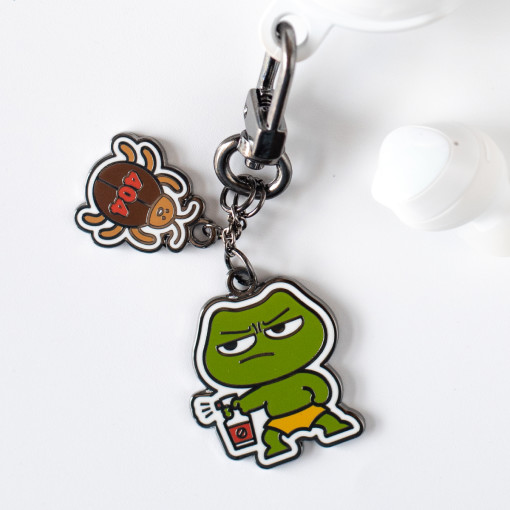

In [129]:
# 이렇게 open해서 가져온 이미지여야 추후에 numpy 배열로 바꿀 수 있음
gary = Image.open('thumbnailImg.jpg')
gary

* image crop, grayscale, size 등 목적에 맞게 이미지 변환

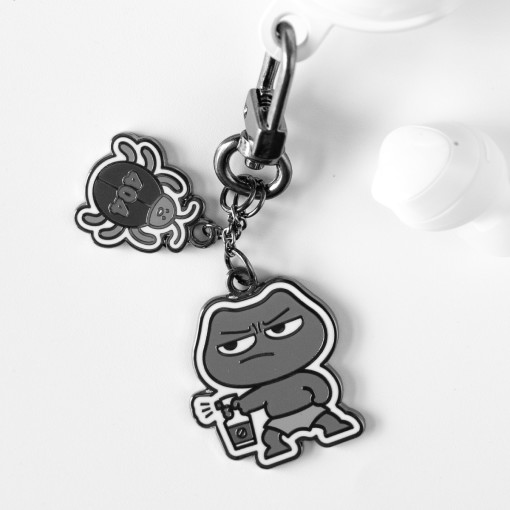

In [139]:
g = gary.convert('L')
g

* numpy를 이용하여 이미지를 array로 변환

In [130]:
import numpy as np

In [131]:
pixel = np.array(gary)
pixel.shape

(510, 510, 3)

In [ ]:
pixel
# type은 uint

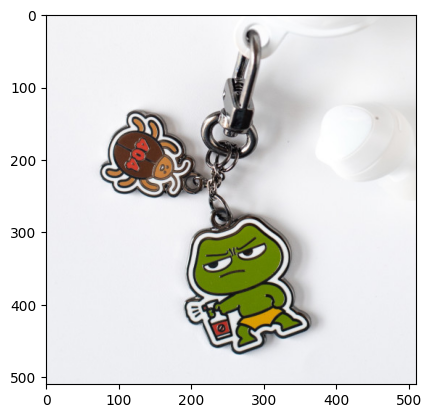

In [136]:
# 다시 이미지로 보고 싶을 때
# Matplotlib의 imshow 사용
plt.imshow(pixel)

* numpy로 배열로 변형했기 때문에 배열을 뒤집으면 이미지도 뒤집힘

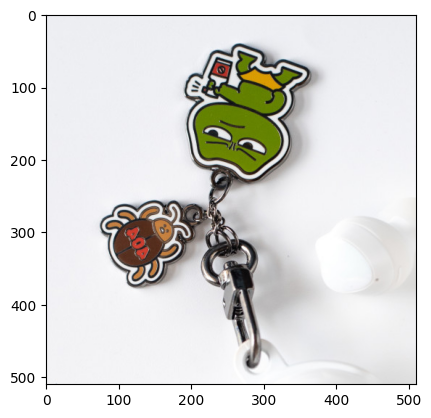

In [140]:
plt.imshow(pixel[::-1])

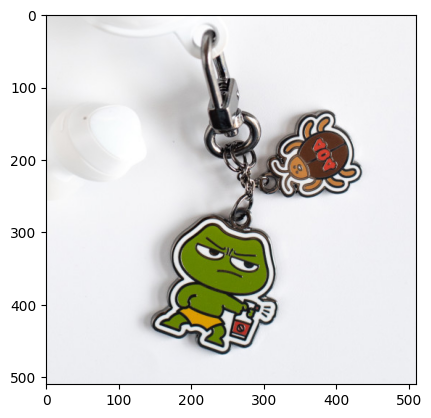

In [141]:
# 좌우반전
plt.imshow(pixel[:, ::-1])

* 이미지 크기 조정 : [세로, 가로]

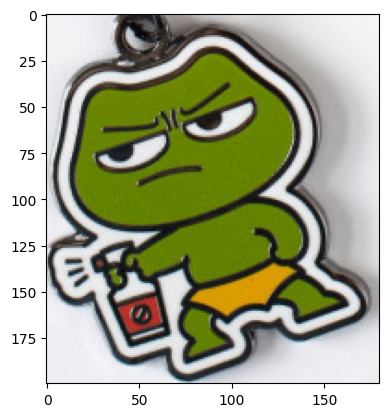

In [157]:
plt.imshow(pixel[270:470, 190:370])

In [ ]:
pixel2 = pixel[270:470, 190:370]
pixel2

In [155]:
pixel2.shape

(200, 180, 3)

* pixel(image)를 hist로 확인했을 때, RGB(0~255) 중 어느 범위의 색상이 많이 사용됐는지 확인

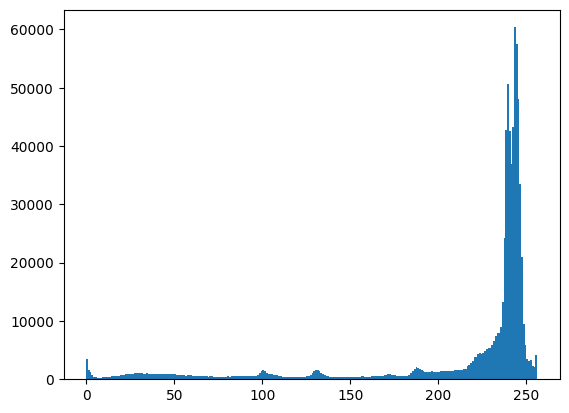

In [158]:
plt.hist(pixel.ravel(), 256, [0, 256])
plt.show()

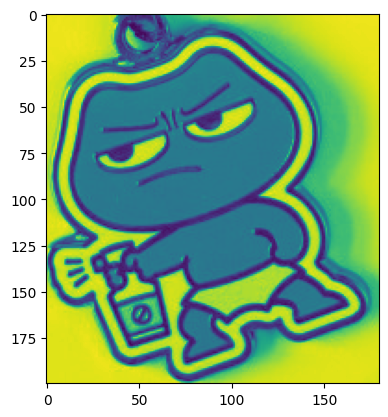

In [159]:
plt.imshow(pixel2[:, :, 0])   # 세로 , 가로, RGB

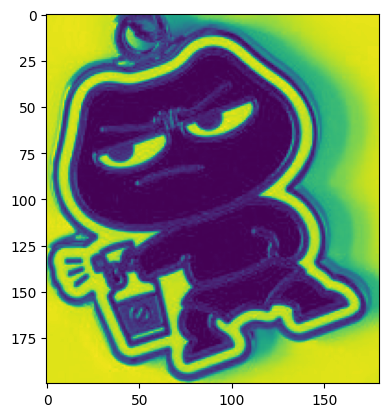

In [162]:
plt.imshow(pixel2[:, :, 2])

In [163]:
# 이미지 불러왔을 때 확인할 정보들
print(gary.filename)
print(gary.format)
print(gary.size)
print(gary.mode)
print(gary.width)
print(gary.height)

thumbnailImg.jpg
JPEG
(510, 510)
RGB
510
510


In [165]:
from PIL import ImageFilter

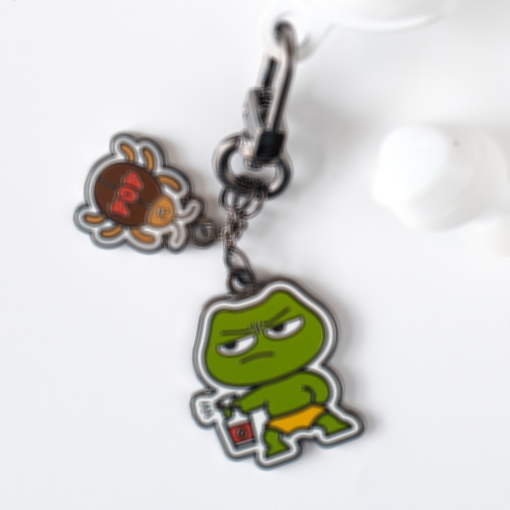

In [167]:
# 블러효과
blur_gary = gary.filter(ImageFilter.BLUR)
blur_gary.show()  # 그냥 이미지 객체라서 그냥 show() / array 형태면 imshow를 사용해야함

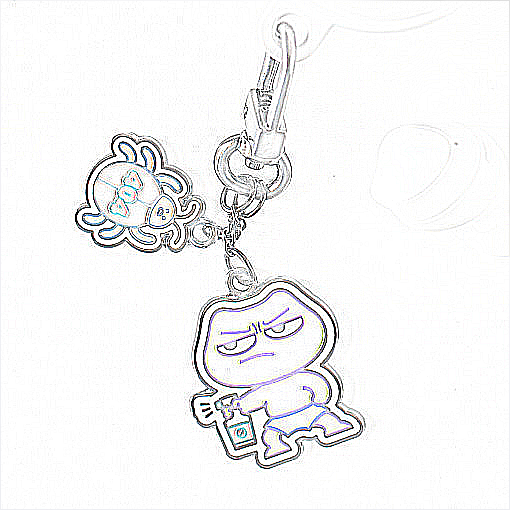

In [168]:
contour_gary = gary.filter(ImageFilter.CONTOUR)
contour_gary.show()